In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logbook esperineza MuLife

## Determinazione Punti di Lavoro PMT

### 15 Febbraio: 
Dimensioni scintillatori: 
- lastre di scintillatori (quelli del telescopio e qullo finale): 49.9 x 27.1 cm^2
- blocco di scintillatore, tutto intero: 29.3 x 30.5 cm^2 (il lato di 30.5 cm è stato misurato molto ad occhio, vista la presenza di altri oggetti)

Determinazione dei punti di lavoro:
Per ciascun PMT misuriamo l'efficienza al variare, prima della sua tensione di alimentazione e poi della tensione di soglia del disciminatore. I punti di lavoro dei PMT usati come riferimento li impostiamo in maniera tale da visualizzare il segnale su entrambi ed essere il più efficienti possibili, cioè impostiamo una tensione di alimentazione alta, entro i limiti prestabiliti e come tensione di soglia ?. Decidiamo di determinare il punto di lavoro ottimale di ciascun pmt (alimentazione e soglia) dalla curva di efficienza (guardando il valore a cui abbiamo il ginocchio-punto di flesso) e non la curva dei conteggi in singola, poichè i pmt usati sono molto rumorosi, perciò servono almeno delle coincidenze doppie, meglio triple, per essere sicuri di acquisire segnali buoni.

PMT7:
- V_alim = 1719.95 V
- V_thr = - 0.406 V
- tau = 50 ns 

PMT5:
- V_alim = 1699.99 V
- V_thr = -0.397 V
- tau \simeq 55 ns
Vediamo che, rispetto al PMT7, il PMT5 è più rumoroso.

PMT4:
- V_alim = 1720.04 V
- V_thr = -0.417 V
- tau $\simeq$ 50 ns
PMT4 è meno rumoroso del 5

PMT3: per gli stessi punti di lavoro del PMT4 il 3 appare più rumoroso, perciò non lo useremo.

PMT2:
- V_alim = 1720.09 V
- V_thr = -0.402 V
- tau $\simeq$ 50 ns

PMT1:
- V_alim = 1720.06 V
- V_thr = -0.409 V
- tau $\simeq$ 50 ns

CURVA DELL'EFFICIENZA PMT7:
manteniamo i punti di lavoro definiti sopra per il PMT4 e PMT2 e variamo invece l'alimentazione del PMT7.

## Efficienza PMTs

## PMT per segnale di start (7,4,2)

In [3]:
df_eff2 = pd.read_csv("./Dati/Punto_di_lavor/PMT7.txt",sep="\t")

In [4]:
df_eff2['doppie_acc']=df_eff2['PMT4']*df_eff2['PMT2']*98*10**(-11)
df_eff2['err7']=np.sqrt(df_eff2['PMT7'])
df_eff2['err5']=np.sqrt(df_eff2['PMT4'])
df_eff2['err2']=np.sqrt(df_eff2['PMT2'])

In [5]:
df_eff2['efficienza']=df_eff2['7&4&2']/(df_eff2['4&2']-df_eff2['doppie_acc'])
df_eff2['err_V']=(df_eff2['Alimentazione PMT7 [V]']*0.0005+1)
df_eff2['err_eff']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])/(df_eff2['4&2']-df_eff2['doppie_acc']))
df_eff2['err_tri']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])*(df_eff2['4&2']-df_eff2['doppie_acc']))

In [6]:
df_eff2

,Alimentazione PMT7 [V],PMT7,PMT4,PMT2,4&2,7&4&2,doppie_acc,err7,err5,err2,efficienza,err_V,err_eff,err_tri
0,1600.04,63,188513,2904,483,5,0.536493,7.937254,434.180838,53.888774,0.010363,1.800020,0.004611,2.224451
1,1649.95,356,176131,2790,509,25,0.481577,18.867962,419.679640,52.820451,0.049162,1.824975,0.009588,4.875545
2,1699.03,1102,187767,2858,547,94,0.525905,33.196385,433.320897,53.460266,0.172012,1.849515,0.016144,8.822182
3,1720.04,1659,184573,2761,516,115,0.499414,40.730824,429.619599,52.545219,0.223084,1.860020,0.018336,9.452266
4,1739.98,2925,177662,2690,495,129,0.468353,54.083269,421.499703,51.865210,0.260853,1.869990,0.019745,9.764731
5,1750.01,4072,186664,2797,479,170,0.511657,63.812225,432.046294,52.886671,0.355286,1.875005,0.021879,10.469071
6,1760.09,6179,191919,2572,496,191,0.483743,78.606615,438.085608,50.714889,0.385457,1.880045,0.021864,10.834103
7,1780.01,12725,197144,2752,495,192,0.531689,112.805142,444.009009,52.459508,0.388296,1.890005,0.021917,10.837306
8,1800.06,22608,184989,2810,474,188,0.509423,150.359569,430.103476,53.009433,0.397051,1.900030,0.022486,10.646801


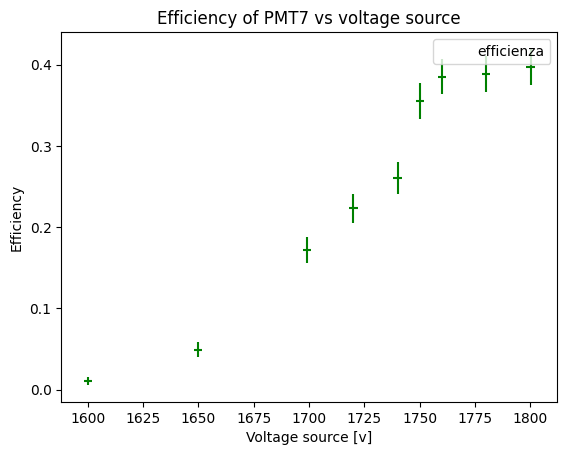

In [7]:
fig_4=df_eff2.plot(x='Alimentazione PMT7 [V]',y='efficienza',
             title='Efficiency of PMT7 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

In [48]:
fig_4.savefig('./Plots/Punti di lavoro/eff_7.pdf')

Dalla curva dell'efficienza del PMT7 decidiamo di utilizzare 1740 V come tensione di alimentazione. 
Procediamo analogamente con il PMT4. 


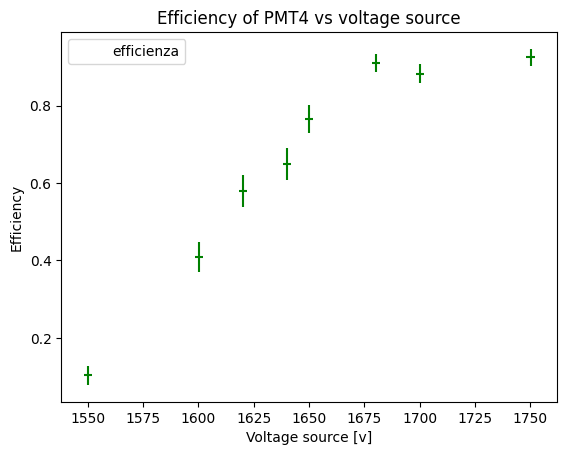

In [8]:
df_eff3 = pd.read_csv("./Dati/Punto_di_lavor/PMT4.txt",sep="\t")
df_eff3['doppie_acc']=df_eff3['PMT7']*df_eff3['PMT2']*98*10**(-11)
df_eff3['err1']=np.sqrt(df_eff3['PMT7'])
df_eff3['err2']=np.sqrt(df_eff3['PMT4'])
df_eff3['err3']=np.sqrt(df_eff3['PMT2'])
df_eff3['efficienza']=df_eff3['7&4&2']/(df_eff3['7&2']-df_eff3['doppie_acc'])
df_eff3['err_V']=(df_eff3['Alimentazione PMT4 [V]']*0.0005+1)
df_eff3['err_eff']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])/(df_eff3['7&2']-df_eff3['doppie_acc']))
df_eff3['err_tri']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])*(df_eff3['7&2']-df_eff3['doppie_acc']))
fig_4=df_eff3.plot(x='Alimentazione PMT4 [V]',y='efficienza',
             title='Efficiency of PMT4 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

In [9]:
df_eff3

,Alimentazione PMT4 [V],PMT7,PMT4,PMT2,7&2,7&4&2,doppie_acc,err1,err2,err3,efficienza,err_V,err_eff,err_tri
0,1550.04,2788,248,2718,155,16,0.007426,52.801515,15.748016,52.134442,0.103231,1.775020,0.024439,3.787916
1,1600.12,2720,1216,2685,159,65,0.007157,52.153619,34.871192,51.816986,0.408823,1.800060,0.038989,6.198909
2,1620.02,2848,5062,2680,143,83,0.007480,53.366656,71.147734,51.768716,0.580450,1.810010,0.041268,5.901072
3,1640.11,2771,18101,2708,134,87,0.007354,52.640289,134.539957,52.038447,0.649289,1.820055,0.041224,5.523751
4,1680.18,2794,76977,2664,145,132,0.007294,52.858301,277.447292,51.613952,0.910391,1.840090,0.023720,3.439250
5,1650.06,2838,27997,2692,137,105,0.007487,53.272882,167.323041,51.884487,0.766465,1.825030,0.036147,4.951883
6,1700.09,2800,111064,2730,178,157,0.007491,52.915026,333.262659,52.249402,0.882060,1.850045,0.024176,4.303097
7,1750.19,2743,1198536,2703,145,134,0.007266,52.373658,1094.776690,51.990384,0.924184,1.875095,0.021983,3.187367


In [49]:
fig_4.savefig('./Plots/Punti di lavoro/eff_4.pdf')

Dalla curva sull'efficienza del PMT4 decidiamo di impostare come alimentazione 1650 V. Ripetiamo per il PMT2, usando PMT7 e PMT4 come riferimento.

In [10]:
df_eff1 = pd.read_csv("./Dati/Punto_di_lavor/PMT2.txt",sep="\t")

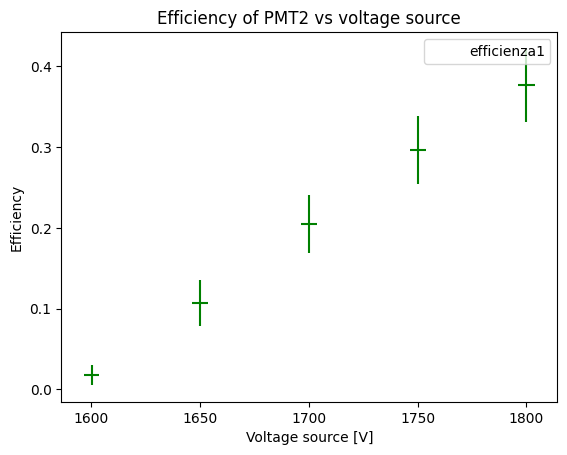

In [14]:
df_eff1 = pd.read_csv("./Dati/Punto_di_lavor/PMT2.txt",sep="\t")
df_eff1['doppie_acc']=df_eff1['PMT7']*df_eff1['PMT4']*98*10**(-11)
df_eff1['err1']=np.sqrt(df_eff1['PMT7'])
df_eff1['err2']=np.sqrt(df_eff1['PMT4'])
df_eff1['err3']=np.sqrt(df_eff1['PMT2'])
df_eff1['efficienza1']=df_eff1['7&4&2']/(df_eff1['7&4']-df_eff1['doppie_acc'])
df_eff1['err_V']=(df_eff1['Alimentazione PMT2 [V]']*0.0005+1)*2
df_eff1['err_eff1']=np.sqrt(df_eff1['efficienza1']*(1-df_eff1['efficienza1'])/df_eff1['7&4'])*2
fig_4=df_eff1.plot(x='Alimentazione PMT2 [V]',y='efficienza1',
             title='Efficiency of PMT2 vs voltage source', 
             xlabel='Voltage source [V]',ylabel='Efficiency',xerr='err_V',yerr='err_eff1',style='.',color='green',linestyle='None'
                ).get_figure()
fig_4.savefig('./Plots/Punti di lavoro/eff_2.pdf')

In [15]:
df_eff1

,Alimentazione PMT2 [V],PMT7,PMT4,PMT2,7&4,7&4&2,doppie_acc,err1,err2,err3,efficienza1,err_V,err_eff1
0,1600.15,2634,28677,340,449,8,0.074025,51.322510,169.342848,18.439089,0.017820,3.60015,0.012487
1,1650.06,2601,26152,957,478,51,0.066661,51.000000,161.715800,30.935417,0.106709,3.65006,0.028243
2,1700.04,2752,28797,2039,498,102,0.077664,52.459508,169.696788,45.155288,0.204851,3.70004,0.036171
3,1750.07,2703,28971,3981,476,141,0.076742,51.990384,170.208695,63.095166,0.296266,3.75007,0.041857
4,1800.01,2611,26711,7069,462,174,0.068348,51.097945,163.435002,84.077345,0.376679,3.80001,0.045087


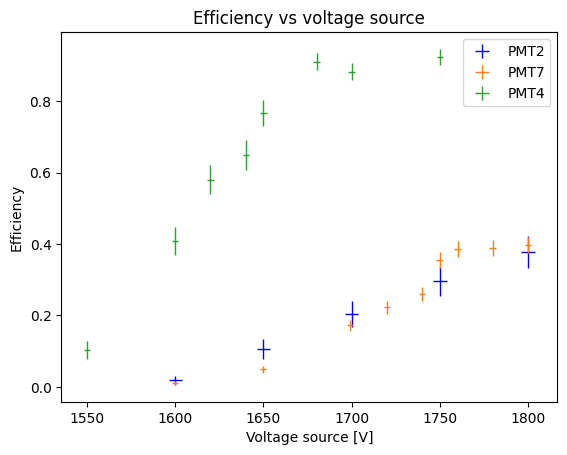

In [16]:
fig = plt.figure()

plt.errorbar(df_eff1['Alimentazione PMT2 [V]'],df_eff1['efficienza1'],
             xerr=df_eff1['err_V'],yerr=df_eff1['err_eff1'],label='PMT2',linestyle='None',elinewidth=1,
             ecolor='blue')

plt.errorbar(df_eff2['Alimentazione PMT7 [V]'],df_eff2['efficienza'],
             xerr=df_eff2['err_V'],yerr=df_eff2['err_eff'],label='PMT7',linestyle='None',elinewidth=1,
             ecolor='#ff7f0e')

plt.errorbar(df_eff3['Alimentazione PMT4 [V]'],df_eff3['efficienza'],

             xerr=df_eff3['err_V'],yerr=df_eff3['err_eff'],label='PMT4',linestyle='None',elinewidth=1,
             ecolor='#2ca02c')

#fig.text(0.65, 0.37, "Errorbars multiplied by 2", fontsize=10, 
         #ha='center',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Voltage source [V]')
plt.ylabel('Efficiency')
plt.title('Efficiency vs voltage source')
plt.legend()
plt.savefig('./Plots/Punti di lavoro/eff.pdf')
plt.show()

Impostiamo quindi V_alim del PMT2 a 1750 V.

## PMT per decadimento (8,9,10,11)

Osserviamo i segnali del PMT8. Impostiamo un'alimentazione di 1126 V e una soglia del discriminatore di 0.177 V.

## Segnale di Start

## Segnale di Stop

## Acquisizione segnali con FPGA

## Prima Acquisizione dati per MuLife

## Errori Sistematici

## Alterazione vita media del muone negativo dalla interazione con il materiale scintillatore

## Spettro in energia dell'elettrone di decadimento

### Calibrazione del modulo di amplificazione di carica

### Altro...

In [303]:
df_eff2_print=df_eff2.copy()

In [304]:
df_eff2_print["V"] = df_eff2["V"].astype(str) + '±' + df_eff2["err_V"].round(0).astype(int).astype(str)
df_eff2_print['1']=df_eff2["1"].astype(str) + '±' + df_eff2["err1"].round(0).astype(int).astype(str)
df_eff2_print['2']=df_eff2["2"].astype(str) + '±' + df_eff2["err2"].round(0).astype(int).astype(str)
df_eff2_print['3']=df_eff2["3"].astype(str) + '±' + df_eff2["err3"].round(0).astype(int).astype(str)
df_eff2_print['efficienza']=df_eff2["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff2_print['doppie_acc']=df_eff2_print['doppie_acc'].round(2)
df_eff2_print['1&2&3']=df_eff2["1&2&3"].astype(str) + '±' + df_eff2["err_tri"].round(0).astype(int).astype(str)

In [305]:
df_eff2_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff2_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &          3 &  1\&3 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 117786±343 &       43±7 & 124865±353 & 1787 &    14±4 &       14.41 & 0.008±0.002 \\
1525±2 & 118337±344 &     116±11 & 127691±357 & 1861 &    28±5 &       14.81 & 0.015±0.003 \\
1550±2 & 114947±339 &     300±17 & 125546±354 & 1828 &    80±9 &       14.14 & 0.044±0.005 \\
1575±2 & 128549±359 &     757±28 & 129436±360 & 1827 &  249±15 &       16.31 & 0.138±0.008 \\
1600±2 & 127551±357 &    1751±42 & 131284±362 & 1843 &  587±20 &       16.41 & 0.321±0.011 \\
1625±2 & 128204±358 &    3351±58 & 134213±366 & 1859 & 1119±21 &       16.86 & 0.607±0.011 \\
1650±2 & 128634±359 &    5329±73 & 131384±362 & 1890 & 1428±18 &       16.56 &  0.762±0.01 \\
1675±2 & 128860±359 &    7889±89 & 128064±358 & 1848 & 1571±15 &       16.17 & 0.858±0.008 \\
1700±2 & 128641±359 &  11111±105 & 129291±360 & 1875 & 1662±13 &       16.30 & 0.894±0.007 \\
1725±2 & 129

In [309]:
df_eff3_print=df_eff3.copy()
df_eff3_print["V"] = df_eff3["V"].astype(str) + '±' + df_eff3["err_V"].round(0).astype(int).astype(str)
df_eff3_print['1']=df_eff3["1"].astype(str) + '±' + df_eff3["err1"].round(0).astype(int).astype(str)
df_eff3_print['2']=df_eff3["2"].astype(str) + '±' + df_eff3["err2"].round(0).astype(int).astype(str)
df_eff3_print['3']=df_eff3["3"].astype(str) + '±' + df_eff3["err3"].round(0).astype(int).astype(str)
df_eff3_print['efficienza']=df_eff3["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff3_print['doppie_acc']=df_eff3_print['doppie_acc'].round(2)
df_eff3_print['1&2&3']=df_eff3["1&2&3"].astype(str) + '±' + df_eff3["err_tri"].round(0).astype(int).astype(str)
df_eff3_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff3_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &            3 &  1\&2 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 107990±329 & 109758±331 &         87±9 & 2733 &    22±5 &       11.62 & 0.008±0.002 \\
1525±2 & 108912±330 & 109573±331 &       298±17 & 2791 &    83±9 &       11.70 &  0.03±0.003 \\
1550±2 & 108212±329 & 109628±331 &      1395±37 & 2747 &  257±15 &       11.63 & 0.094±0.005 \\
1560±2 & 107425±328 & 109808±331 &      2573±51 & 2743 &  440±19 &       11.56 & 0.161±0.008 \\
1575±2 & 107749±328 & 109709±331 &      4973±71 & 2779 &  662±22 &       11.58 & 0.239±0.011 \\
1585±2 & 107559±328 & 110563±333 &      6468±80 & 2842 &  819±24 &       11.65 & 0.289±0.011 \\
1595±2 & 107066±327 & 109347±331 &      9051±95 & 2792 & 1113±26 &       11.47 &    0.4±0.01 \\
1600±2 & 108045±329 & 110262±332 &    10339±102 & 2787 & 1167±26 &       11.67 &  0.42±0.008 \\
1625±2 & 107711±328 & 110826±333 &    16819±130 & 2841 & 1485±27 &       11.70 & 0.525±0

In [ ]:
df_eff1=pd.DataFrame({'1': [122607], '2': [111009],'3':[118695],'2&3':[2800],'1&2&3':[1733]})

In [ ]:
df_eff1['doppie_acc']=df_eff1['1']*df_eff1['2']*98*10**(-11)
df_eff1['err1']=np.sqrt(df_eff1['1'])
df_eff1['err2']=np.sqrt(df_eff1['2'])
df_eff1['err3']=np.sqrt(df_eff1['3'])
df_eff1['efficienza']=df_eff1['1&2&3']/(df_eff1['2&3']-df_eff1['doppie_acc'])
#df_eff1['err_V']=(df_eff1['V']*0.0005+1)
df_eff1['err_eff']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])/(df_eff1['2&3']-df_eff1['doppie_acc']))
df_eff1['err_tri']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])*(df_eff1['2&3']-df_eff1['doppie_acc']))

In [ ]:
df_eff1